# Entrega final: AirBnB
## Pablo González Maya

Airbnb és  una  plataforma  que  permet  publicar,  descobrir  i  reservar  diferents  allotjaments.  Disposa  de propietats en més de 192 països repartides en 33.000 ciutats d'arreu del món. Es va crear a finals de l'any 2008 i  avui  dia  és  un  dels  recursos més  buscats  sobretot  per  viatjants.
Únicament  a  Mallorca  disposa  de  14900 allotjaments de diferent tipus.Un dels problemes que es troben els hosts quan volen afegir un nou allotjament a la plataforma és determinar el preu de lloguer. En aquest problema la pregunta que haureu de resoldre és: quin preu de lloguer posar a una propietatsabent les seves característiques?

### Importar los datos

Primero, importamos el fichero CSV que contiene los datos con los que se va a trabajar.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

from plotnine import *

In [2]:
df_airbnb = pd.read_csv('airbnb.csv', sep=',')

Miramos qué datos tiene el dataset.

In [3]:
list(df_airbnb)

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'description',
 'neighborhood_overview',
 'picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'latitude',
 'longitude',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bathrooms_text',
 'bedrooms',
 'beds',
 'amenities',
 'price',
 'minimum_nights',
 'maximum_nights',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'calendar_updated',
 'has_availability',
 'availability_30',
 'availa

### Data Wrangling

Vemos la columna que nos interesa: el precio.

In [4]:
df_airbnb["price"].head()

0     $89.00
1    $175.00
2    $140.00
3    $200.00
4    $110.00
Name: price, dtype: object

Al estar como string, necesitamos transformarlo a un número (tipo float) para poder manejarlo.

In [5]:
df_airbnb["price"] = df_airbnb["price"].str.replace("$","").str.replace(",","").astype(float)
df_airbnb["price"].dtype
df_airbnb.price.describe()

count    17608.000000
mean       244.383561
std        409.958169
min          0.000000
25%        110.000000
50%        179.000000
75%        275.000000
max      20736.000000
Name: price, dtype: float64

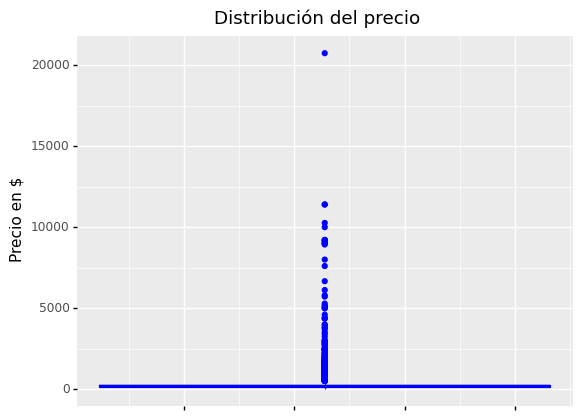

<ggplot: (137376076650)>

In [6]:
(
    ggplot(df_airbnb,aes(x='id',y='price')) +
    geom_boxplot(color='blue') +
    labs(x='',y='Precio en $') +
    theme(axis_text_x=element_blank())+
    labs(title='Distribución del precio')
)

In [7]:
df_airbnb[df_airbnb['price'] > 15000].head()

id                            listing_url       scrape_id  \
6135  19853184  https://www.airbnb.com/rooms/19853184  20200919153121   

     last_scraped                                               name  \
6135   2020-09-19  Idyllic 2 bedroom holiday cottage with large pool   

                                            description  \
6135  This very attractive 2 bedroom holiday villa i...   

                                  neighborhood_overview  \
6135  Set in the prestigious area of La Font, a leaf...   

                                            picture_url    host_id  \
6135  https://a0.muscache.com/pictures/4adbe791-7fb9...  100756477   

                                         host_url  ...  \
6135  https://www.airbnb.com/users/show/100756477  ...   

     review_scores_communication review_scores_location review_scores_value  \
6135                        10.0                    9.0                10.0   

     license instant_bookable calculated_host_listings_count  \
6135  491509                t                             15   

     calculated_host_listings_count_entire_homes  \
6135                                          15   

     calculated_host_listings_count_private_rooms  \
6135                                            0   

     calculated_host_listings_count_shared_rooms reviews_per_month  
6135                                           0              0.16  

[1 rows x 74 columns]

In [8]:
df_airbnb[df_airbnb['price'] == 0].head()

id                            listing_url       scrape_id  \
15415  42384657  https://www.airbnb.com/rooms/42384657  20200919153121   

      last_scraped                             name description  \
15415   2020-09-20  PURO Hotel (Breakfast Included)         NaN   

      neighborhood_overview  \
15415                   NaN   

                                             picture_url    host_id  \
15415  https://a0.muscache.com/pictures/a36d1e37-a81d...  270236083   

                                          host_url  ...  \
15415  https://www.airbnb.com/users/show/270236083  ...   

      review_scores_communication review_scores_location review_scores_value  \
15415                         NaN                    NaN                 NaN   

      license instant_bookable calculated_host_listings_count  \
15415     NaN                f                              5   

      calculated_host_listings_count_entire_homes  \
15415                                           0   

      calculated_host_listings_count_private_rooms  \
15415                                            0   

      calculated_host_listings_count_shared_rooms reviews_per_month  
15415                                           0               NaN  

[1 rows x 74 columns]

Vemos que claramente las viviendas anterior son outliers. Ya que la media está alrededor de 244 y no tiene sentido que un alquiler sea gratuito. Por tanto, limpiamos los outliers dejando solo las viviendas cuyo precio está entre 0 y 500.

In [9]:
df_airbnb = df_airbnb.loc[(df_airbnb.price <=500) & (df_airbnb.price>0)]

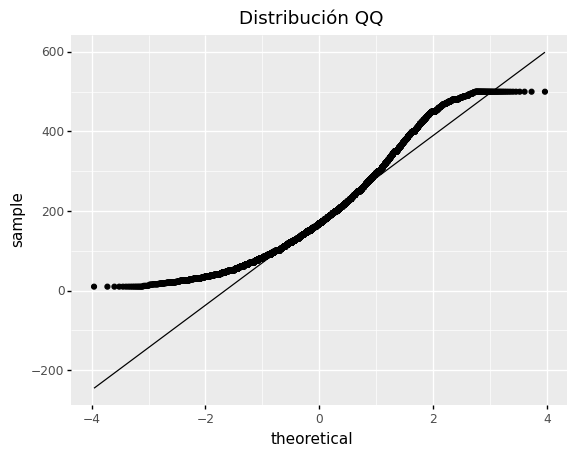

<ggplot: (137375093387)>

In [10]:
(
    ggplot(df_airbnb,aes(sample='price')) +
    geom_qq() + 
    stat_qq_line() +
    labs(title='Distribución QQ')
)

In [11]:
df_airbnb.describe()

id     scrape_id       host_id  host_listings_count  \
count  1.637900e+04  1.637900e+04  1.637900e+04         16377.000000   
mean   2.607337e+07  2.020092e+13  1.022001e+08           132.295720   
std    1.296969e+07  3.152440e+00  9.504032e+07           249.802082   
min    1.154700e+04  2.020092e+13  4.294200e+04             0.000000   
25%    1.652702e+07  2.020092e+13  2.143104e+07             2.000000   
50%    2.608163e+07  2.020092e+13  8.063674e+07            14.000000   
75%    3.785016e+07  2.020092e+13  1.532496e+08           130.000000   
max    4.549921e+07  2.020092e+13  3.679802e+08          1136.000000   

       host_total_listings_count  neighbourhood_group_cleansed      latitude  \
count               16377.000000                           0.0  16379.000000   
mean                  132.295720                           NaN     39.657677   
std                   249.802082                           NaN      0.166143   
min                     0.000000                           NaN     39.301970   
25%                     2.000000                           NaN     39.544810   
50%                    14.000000                           NaN     39.671280   
75%                   130.000000                           NaN     39.797740   
max                  1136.000000                           NaN     39.930650   

          longitude  accommodates  bathrooms  ...  review_scores_cleanliness  \
count  16379.000000  16379.000000        0.0  ...               10474.000000   
mean       2.999027      5.587643        NaN  ...                   9.411591   
std        0.241794      2.490094        NaN  ...                   0.999696   
min        2.346500      1.000000        NaN  ...                   2.000000   
25%        2.836255      4.000000        NaN  ...                   9.000000   
50%        3.049150      6.000000        NaN  ...                  10.000000   
75%        3.146155      7.000000        NaN  ...                  10.000000   
max        3.475520     16.000000        NaN  ...                  10.000000   

       review_scores_checkin  review_scores_communication  \
count           10471.000000                 10472.000000   
mean                9.687040                     9.638178   
std                 0.811535                     0.902572   
min                 2.000000                     2.000000   
25%                10.000000                    10.000000   
50%                10.000000                    10.000000   
75%                10.000000                    10.000000   
max                10.000000                    10.000000   

       review_scores_location  review_scores_value  \
count            10472.000000         10471.000000   
mean                 9.496944             9.181931   
std                  0.814695             1.025483   
min                  2.000000             2.000000   
25%                  9.000000             9.000000   
50%                 10.000000             9.000000   
75%                 10.000000            10.000000   
max                 10.000000            10.000000   

       calculated_host_listings_count  \
count                    16379.000000   
mean                        97.936199   
std                        209.947816   
min                          1.000000   
25%                          2.000000   
50%                         12.000000   
75%                         90.000000   
max                        912.000000   

       calculated_host_listings_count_entire_homes  \
count                                 16379.000000   
mean                                     97.043226   
std                                     208.916172   
min                                       0.000000   
25%                                       1.000000   
50%                                      11.000000   
75%                                      90.000000   
max                                     906.000000   

       calculated_host_listings_

In [12]:
df_airbnb.reviews_per_month.head()

0    0.93
1    1.47
2    0.14
3    0.09
4     NaN
Name: reviews_per_month, dtype: float64

Limpiamos los campos que no aportan nada (id, URLs, fechas, disponibilidad...).

In [13]:
df_airbnb_reduced = df_airbnb.drop(columns=['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description', 'picture_url', 'neighborhood_overview', 'host_verifications', 'host_has_profile_pic', 'host_about', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_response_time', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'neighbourhood', 'neighbourhood_group_cleansed', 'bathrooms',  'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'calendar_last_scraped', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review', 'last_review', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'reviews_per_month'])

In [14]:
list(df_airbnb_reduced)

['host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_identity_verified',
 'neighbourhood_cleansed',
 'latitude',
 'longitude',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms_text',
 'bedrooms',
 'beds',
 'amenities',
 'price',
 'minimum_nights',
 'maximum_nights',
 'number_of_reviews',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'license',
 'instant_bookable']

Separar las amenities en diferentes columnas usando OneHotEncoding.

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(tokenizer=lambda x: x.split(','))
amenities = count_vectorizer.fit_transform(df_airbnb_reduced.amenities)
columns=count_vectorizer.get_feature_names()
for index, item in enumerate(columns):
    replaced = item.replace('"','').replace('[','').replace(']','').strip()
    columns[index] = replaced
df_amenities = pd.DataFrame(amenities.toarray(),columns=columns)
df_amenities.drop('',axis=1,inplace=True)
df_repeated = pd.DataFrame()
print('Starting amenities files, columns: ',df_amenities.shape)
for col in df_amenities.columns:
    if col not in df_repeated.columns:
         if len(df_amenities.filter(like=col).columns) > 1:
            df_repeated[col] = df_amenities[col].any(1)
            df_repeated = df_repeated.applymap(lambda x: 1 if x else 0)        
            df_amenities.drop(col,axis=1,inplace=True)
df_amenities = pd.concat([df_amenities,df_repeated],axis=1,join='inner')
df_amenities.columns = df_amenities.columns.str.replace(' ', '_')
print('Final amenities files, columns: ',df_amenities.shape)
df_amenities.head()

Starting amenities files, columns:  (16379, 196)
Final amenities files, columns:  (16379, 97)


baking_sheet  barbecue_utensils  bed_linens  ceiling_fan  \
0             0                  0           0            0   
1             0                  0           0            0   
2             0                  0           0            0   
3             0                  0           0            0   
4             0                  0           0            0   

   cleaning_before_checkout  conditioner  dishwasher  freezer  high_chair  \
0                         0            0           0        0           0   
1                         0            0           0        0           0   
2                         0            0           1        0           1   
3                         0            0           0        0           0   
4                         0            0           0        0           0   

   indoor_fireplace  ...  ski-in/ski-out  smart_lock  smoke_alarm  stove  \
0                 0  ...               0           0            0      1   
1                 1  ...               0           0            1      0   
2                 0  ...               0           0            1      1   
3                 1  ...               0           0            0      0   
4                 0  ...               0           0            0      0   

   table_corner_guards  tv  washer  waterfront  wifi  window_guards  
0                    0   1       1           0     1              0  
1                    0   1       1           0     1              0  
2                    0   1       1           0     1              0  
3                    0   1       0           0     1              0  
4                    0   1       1           0     1              0  

[5 rows x 97 columns]

Transformar las columnas V/F por 1/0 respectivamente.

In [16]:
boolean_list = []
for col in df_airbnb_reduced.columns:
    if df_airbnb_reduced[col].unique().size == 3:
        column_array_values = np.delete(df_airbnb_reduced[col].unique(),2,0)
        if set(column_array_values)==set(['t','f']):
            boolean_list.append(col)
    if df_airbnb_reduced[col].unique().size == 2:
        if set(column_array_values)==set(['t','f']):
            boolean_list.append(col)
for col in boolean_list:
    df_airbnb_reduced[col] = df_airbnb_reduced[col].replace('f',0)
    df_airbnb_reduced[col] = df_airbnb_reduced[col].replace('t',1)

Las dos columnas que usan porcentajes, transformarlos a float.

In [17]:
df_airbnb_reduced["host_response_rate"] = df_airbnb_reduced["host_response_rate"].str.replace("%","").astype(float).div(100)

In [18]:
df_airbnb_reduced["host_acceptance_rate"] = df_airbnb_reduced["host_acceptance_rate"].str.replace("%","").astype(float).div(100)

Si tiene licencia se indicará con un 1, y si no tiene 0, en el campo license.

In [19]:
df_airbnb_reduced["license"] = df_airbnb_reduced["license"].notnull().astype('int')

Dar formato al campo de nº de baños.

In [20]:
df_airbnb_reduced["bathrooms_text"] = df_airbnb_reduced["bathrooms_text"].str.replace(" ","")
df_airbnb_reduced["bathrooms_text"] = df_airbnb_reduced["bathrooms_text"].str.replace("bath","")
df_airbnb_reduced["bathrooms_text"] = df_airbnb_reduced["bathrooms_text"].str.replace("private","")
df_airbnb_reduced["bathrooms_text"] = df_airbnb_reduced["bathrooms_text"].str.replace("Private","")
df_airbnb_reduced["bathrooms_text"] = df_airbnb_reduced["bathrooms_text"].str.replace("shared","")
df_airbnb_reduced["bathrooms_text"] = df_airbnb_reduced["bathrooms_text"].str.replace("Shared","")
df_airbnb_reduced["bathrooms_text"] = df_airbnb_reduced["bathrooms_text"].str.replace("-","")
df_airbnb_reduced["bathrooms_text"] = df_airbnb_reduced["bathrooms_text"].str.replace("half","0.5")
df_airbnb_reduced["bathrooms_text"] = df_airbnb_reduced["bathrooms_text"].str.replace("Half","0.5")
df_airbnb_reduced["bathrooms_text"] = df_airbnb_reduced["bathrooms_text"].str.replace("s","")
df_airbnb_reduced["bathrooms_text"] = df_airbnb_reduced["bathrooms_text"].fillna(1)
df_airbnb_reduced["bathrooms_text"] = df_airbnb_reduced["bathrooms_text"].astype('float')

Añadir las amenities al data frame reducido.

In [21]:
df_airbnb_reduced.drop('amenities',axis=1,inplace=True)
df_airbnb_reduced = pd.concat([df_airbnb_reduced,df_amenities],axis=1,join='inner')

In [22]:
df_airbnb_reduced.head()

host_response_rate  host_acceptance_rate  host_is_superhost  \
0                 1.0                  0.96                0.0   
1                 NaN                  1.00                0.0   
2                 1.0                  0.83                1.0   
3                 1.0                   NaN                0.0   
4                 1.0                   NaN                0.0   

   host_identity_verified      neighbourhood_cleansed  latitude  longitude  \
0                     1.0                      Calvià  39.51888    2.48182   
1                     1.0             Santa Margalida  39.76347    3.16255   
2                     1.0           Maria de la Salut  39.66044    3.07165   
3                     1.0  Sant Llorenç des Cardassar  39.61600    3.30121   
4                     0.0           Palma de Mallorca  39.56478    2.60333   

               property_type        room_type  accommodates  ...  \
0           Entire apartment  Entire home/apt             2  ...   
1               Entire house  Entire home/apt             8  ...   
2           Entire townhouse  Entire home/apt             6  ...   
3               Entire villa  Entire home/apt             4  ...   
4  Private room in apartment     Private room             2  ...   

   ski-in/ski-out  smart_lock  smoke_alarm  stove  table_corner_guards  tv  \
0               0           0            0      1                    0   1   
1               0           0            1      0                    0   1   
2               0           0            1      1                    0   1   
3               0           0            0      0                    0   1   
4               0           0            0      0                    0   1   

   washer  waterfront  wifi  window_guards  
0       1           0     1              0  
1       1           0     1              0  
2       1           0     1              0  
3       0           0     1              0  
4       1           0     1              0  

[5 rows x 123 columns]

In [23]:
list(df_airbnb_reduced)

['host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_identity_verified',
 'neighbourhood_cleansed',
 'latitude',
 'longitude',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms_text',
 'bedrooms',
 'beds',
 'price',
 'minimum_nights',
 'maximum_nights',
 'number_of_reviews',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'license',
 'instant_bookable',
 'baking_sheet',
 'barbecue_utensils',
 'bed_linens',
 'ceiling_fan',
 'cleaning_before_checkout',
 'conditioner',
 'dishwasher',
 'freezer',
 'high_chair',
 'indoor_fireplace',
 'lake_access',
 'mini_fridge',
 'nespresso_machine',
 'paid_parking_off_premises',
 'paid_parking_on_premises',
 'piano',
 'pour_over_coffee',
 'rice_maker',
 'shower_gel',
 'sound_system',
 'stair_gates',
 'trash_compactor',
 'air_conditioning',
 'baby_bath',
 'baby_monitor',
 'babysi

Borramos aquellas filas que tengan algún NaN.

In [24]:
df_airbnb_reduced = df_airbnb_reduced.dropna()

Analizamos algunas gráficas para entender los datos:

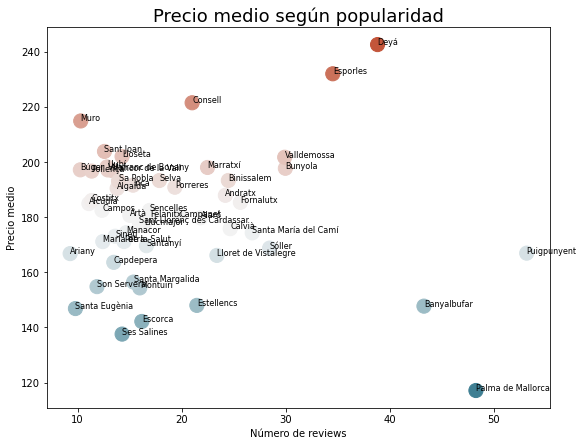

In [25]:
import matplotlib.pyplot as plt
def plot_price_vs_popularity(df, top_k):
    x = df.groupby('neighbourhood_cleansed')['number_of_reviews'].mean().sort_index()[:top_k]
    y = df.groupby('neighbourhood_cleansed')['price'].mean().sort_index()[:top_k]
    n = (x.reset_index()).neighbourhood_cleansed.tolist()[:top_k]
    fig, ax = plt.subplots(figsize=(9, 7))
    ax.scatter(x, y, c=y, cmap=sns.diverging_palette(220, 20, sep=20, as_cmap=True), s=200)
    for i, txt in enumerate(n):
        ax.annotate(txt, (x[i], y[i]), fontsize=8)
    plt.xlabel('Número de reviews')
    plt.ylabel('Precio medio')
    plt.title('Precio medio según popularidad',fontsize=18)
plot_price_vs_popularity(df_airbnb_reduced, 70)

In [26]:
df_airbnb_without_amenities = df_airbnb_reduced.drop(list(df_amenities), axis=1)

<AxesSubplot:>

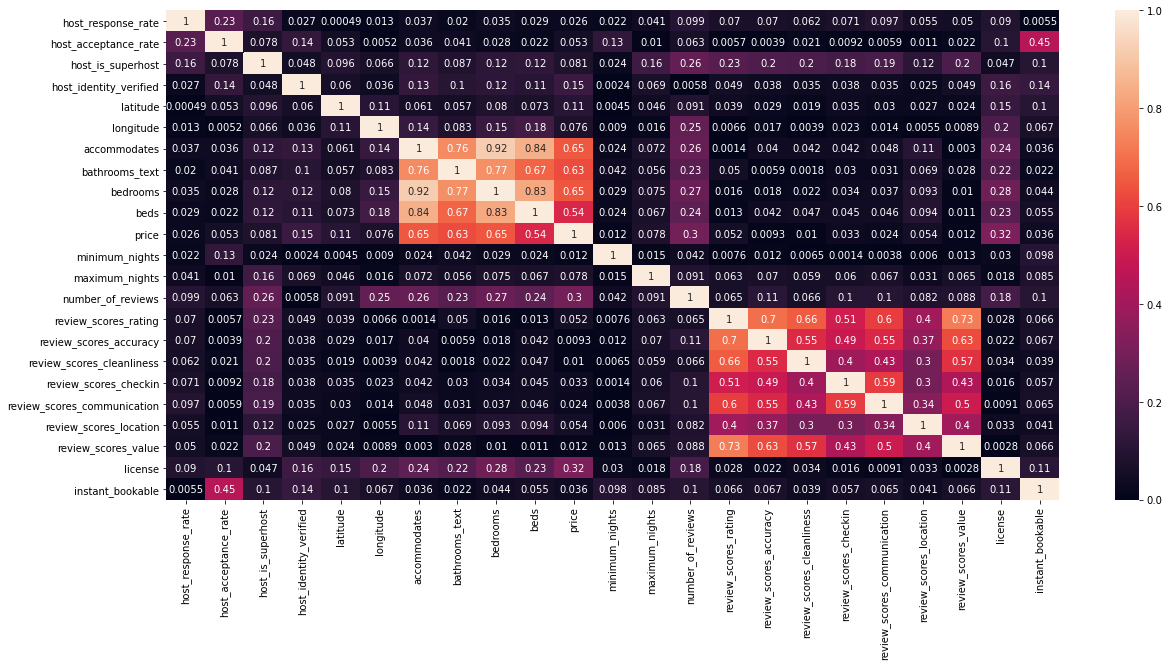

In [27]:
corr_matrix = df_airbnb_without_amenities.corr()
corr_matrix = abs(corr_matrix)
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corr_matrix, vmax=1, vmin=0, annot=True)

Vemos que para el precio, los valores que más relación tendrán son los accommodates, bathroom_text, bedrooms y beds. Sin tener en cuenta las amenities ya que resultaría demasiado grande para ver los resultados.

Finalmente, factorizamos los dos campos string a integers para poder usarlos posteriormente.

In [28]:
df_airbnb_reduced["neighbourhood_cleansed"] = pd.factorize(df_airbnb_reduced["neighbourhood_cleansed"])[0]
df_airbnb_reduced["property_type"] = pd.factorize(df_airbnb_reduced["property_type"])[0]
df_airbnb_reduced["room_type"] = pd.factorize(df_airbnb_reduced["room_type"])[0]

### Modelización

Se trata de un problema de regresión, ya que consideramos que el precio es una variable contínua.

Dividimos el dataset en dos sub datasets, el de entreno y el de testeo con el 20% del tamaño total del dataset.

In [29]:
from sklearn.model_selection import train_test_split

test_size=0.2

X_train, X_test, y_train, y_test = train_test_split(df_airbnb_reduced.drop(["price"], axis=1), df_airbnb_reduced['price'], test_size=test_size, random_state=42)

In [30]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

reg_DT = DecisionTreeRegressor(random_state=42)
reg_LR = LinearRegression()

reg_DT.fit(X_train, y_train)
reg_LR.fit(X_train, y_train)

LinearRegression()

In [31]:
from sklearn.metrics import mean_squared_error

def RMSE(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

in_sample_error_DT = RMSE(y_train, reg_DT.predict(X_train))
in_sample_error_LR = RMSE(y_train, reg_LR.predict(X_train))

print('Error de DT para los datos de entrenamiento: {e}$'.format(e=round(in_sample_error_DT, 2)))
print('Error de LR para los datos de entrenamiento: {e}$'.format(e= round(in_sample_error_LR, 2)))

Error de DT para los datos de entrenamiento: 0.0$
Error de LR para los datos de entrenamiento: 68.27$


In [32]:
out_sample_error_DT = RMSE(y_test, reg_DT.predict(X_test))
out_sample_error_LR = RMSE(y_test, reg_LR.predict(X_test))

print('Error de DT para los datos de testing: {e}$'.format(e=round(out_sample_error_DT, 2)))
print('Error de LR para los datos de testing: {e}$'.format(e= round(out_sample_error_LR, 2)))

Error de DT para los datos de testing: 93.99$
Error de LR para los datos de testing: 72.96$


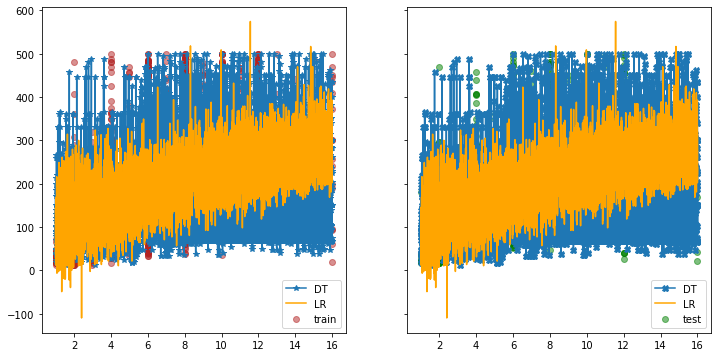

In [33]:
# Valor minimo del campo accommodates
x_min = df_airbnb_reduced.accommodates.min()

# Valor máximo del campo accommodates
x_max = df_airbnb_reduced.accommodates.max()

# Array de elementos que vayan de manera uniforme entre los límites de accommodates.
x = np.linspace(x_min, x_max, len(df_airbnb_reduced["accommodates"]))

# .reshape(-1, 1). Nos evitará problemas con el resto de la librería.
x = x.reshape(-1, 1)

# Predicción para los valores del array creado en el paso anterior para cada uno de los modelos
df_x = df_airbnb_reduced.drop(["price"], axis=1)
df_x["accommodates"] = x
y_DT = reg_DT.predict(df_x)
y_LR = reg_LR.predict(df_x)

# Subplot de dos columnas con un tamaño de 12 x 6
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(12, 6))

# Asignar al primer subplot los datos de entreno contra las predicciones de los dos modelos
ax[0].scatter(X_train['accommodates'], y_train, label='train', c='firebrick', alpha=0.5)
ax[0].plot(x, y_DT, '*-', label='DT')
ax[0].plot(x, y_LR, c='orange', label = 'LR')
ax[0].legend()

# Asignar al segundo subplot los datos de testeo contra las predicciones de los dos modelos
ax[1].scatter(X_test['accommodates'], y_test, label='test', c='green', alpha=0.5)
ax[1].plot(x, y_DT, 'X-', label='DT')
ax[1].plot(x, y_LR,  c='orange', label = 'LR')
ax[1].legend()

Como podemos ver el DecisionTree (DT) tiene mucho overfitting, ya que sobre los datos de entreno acierta a la perfección los precios, pero sobre los datos de test tiene mucho error. En este caso, resulta más conveniente usar LinearRegression (LR), ya que el error es más similar tanto en el caso de entrenamiento como en el conjunto de test.

Comparamos gráficamente como evoluciona el RMSE en función de la profundidad del arbol.

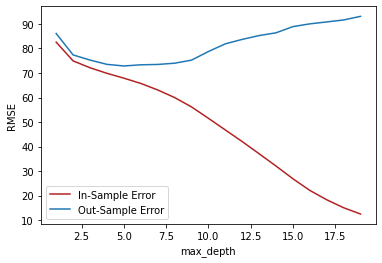

In [34]:
max_depths = range(1, 20)
in_sample_errors = []
out_sample_errors = []
for max_depth in max_depths:
    tree = DecisionTreeRegressor(max_depth=max_depth).fit(X_train, y_train)
    y_pred_train = tree.predict(X_train)
    y_pred_test = tree.predict(X_test)
    in_sample_errors.append(RMSE(y_train, y_pred_train))
    out_sample_errors.append(RMSE(y_test, y_pred_test))

plt.plot(max_depths, in_sample_errors, c='firebrick', label='In-Sample Error')
plt.plot(max_depths, out_sample_errors, label='Out-Sample Error')

plt.xlabel('max_depth')
plt.ylabel('RMSE')
plt.legend(loc='best')

### Validación cruzada

In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

rmse_scorer = make_scorer(RMSE, greater_is_better=False)

DT_scores = cross_val_score(estimator=DecisionTreeRegressor(), X=df_airbnb_reduced.values, y=df_airbnb_reduced.price, cv=10, scoring=rmse_scorer)

print('RMSE for DT: {m} +- {s}'.format(m=-round(DT_scores.mean(), 2),
                                       s=round(DT_scores.std(),2)))

RMSE for DT: 0.17 +- 0.03


Vemos la gráfica de cómo evoluciona el RMSE medio para k=5

Text(0, 0.5, 'RMSE')

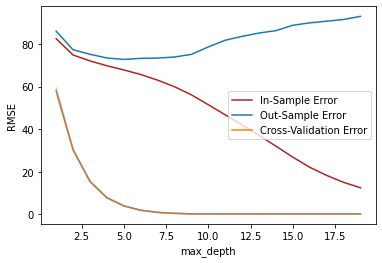

In [36]:
# inicializa una lista vacia
cv_test_errors_mean = []
cv_test_errors_list = []

#itera sobre la lista de max_depths vistos anteriormente para el DecissionTree
for max_depth in max_depths:
    # Instancia el arbol
    tree = DecisionTreeRegressor(max_depth=max_depth)
    
    # calcula el error usando cross_val_score y todo el set de datos
    cv_test_error = -cross_val_score(tree, X=df_airbnb_reduced.values, y=df_airbnb_reduced.price,
                                                     cv=5, scoring=rmse_scorer)
    #calcula el valor medio y hace un append a la lista
    cv_test_errors_mean.append(cv_test_error.mean())
    
    # hacer un append a la lista con todo el array de errores
    cv_test_errors_list.append(cv_test_error)

plt.plot(max_depths, in_sample_errors, c='firebrick', label='In-Sample Error')
plt.plot(max_depths, out_sample_errors, label='Out-Sample Error')
plt.plot(max_depths, cv_test_errors_mean, label='Cross-Validation Error')
plt.legend(loc='best')
errors = pd.DataFrame(cv_test_errors_list)
for e in errors:
    plt.plot(max_depths, errors[e], c='gray', alpha=0.2)
plt.xlabel('max_depth')
plt.ylabel('RMSE')

In [37]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth': range(1, 10)}

reg = DecisionTreeRegressor()

gs_reg_DT = GridSearchCV(estimator=reg,
                         param_grid=params,
                         cv=5,
                         scoring=rmse_scorer)

gs_reg_DT.fit(df_airbnb_reduced.values, df_airbnb_reduced.price)
print(gs_reg_DT.best_params_)

{'max_depth': 9}


Dataframe con los resultados de las iteraciones.

In [38]:
df_cv_results = pd.DataFrame(gs_reg_DT.cv_results_)

df_cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.033377      0.005885         0.001401        0.000488   
1       0.041175      0.001165         0.001402        0.000490   
2       0.056172      0.005486         0.001597        0.000802   
3       0.064964      0.001789         0.002402        0.001010   
4       0.075356      0.002060         0.001401        0.000489   
5       0.089956      0.007271         0.001397        0.000493   
6       0.100142      0.002134         0.001402        0.000489   
7       0.112935      0.006780         0.001406        0.000799   
8       0.130335      0.013488         0.001805        0.000401   

  param_max_depth            params  split0_test_score  split1_test_score  \
0               1  {'max_depth': 1}         -59.028731         -59.870981   
1               2  {'max_depth': 2}         -30.364547         -30.671086   
2               3  {'max_depth': 3}         -15.661678         -15.543593   
3               4  {'max_depth': 4}          -7.792984          -7.831594   
4               5  {'max_depth': 5}          -3.964427          -3.984575   
5               6  {'max_depth': 6}          -1.823655          -1.963171   
6               7  {'max_depth': 7}          -0.845011          -0.938042   
7               8  {'max_depth': 8}          -0.463682          -0.480242   
8               9  {'max_depth': 9}          -0.285646          -0.258485   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0         -57.737126         -56.350697         -58.231436       -58.243794   
1         -30.517388         -30.311537         -29.948558       -30.362623   
2         -15.564467         -15.357328         -15.110622       -15.447538   
3          -7.967967          -7.729058          -7.643804        -7.793082   
4          -4.026058          -3.814797          -3.961050        -3.950181   
5          -1.965687          -1.859129          -1.910858        -1.904500   
6          -0.939484          -0.887886          -0.882870        -0.898659   
7          -0.462216          -0.435123          -0.447065        -0.457665   
8          -0.216921          -0.182006          -0.167113        -0.222034   

   std_test_score  rank_test_score  
0        1.192019                9  
1        0.242143                8  
2        0.195144                7  
3        0.108121                6  
4        0.071541                5  
5        0.056251                4  
6        0.035947                3  
7        0.015409                2  
8        0.044766                1

En él podemos observar como la score en los 5 splits se va acercando a 0 según aumenta el max_depth. De esta forma concluimos que el error se va reduciendo y por tanto la predicción va mejorando.